<a href="https://colab.research.google.com/github/SH22Hwang/GNU_AugumentedIntelligenceLab/blob/main/%EC%97%84%EC%A7%80/4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
# setting => 보여주기식이라 필요 없을듯
Idx = pd.Series(['A', 'B', 'C', 'D', 'E', 'F', 'G'])
HorsePower = pd.Series([130, 250, 190, 300, 210, 220, 170])
Efficiency = pd.Series([16.3, 10.2, 11.1, 7.1, 12.1, 13.2, 14.2])

P_carCompany = pd.DataFrame({'idx' : Idx, 'horse power' : HorsePower, 'efficiency' : Efficiency})
P_carCompany1 = P_carCompany.transpose()
P_carCompany2 = P_carCompany1.rename(columns=P_carCompany1.iloc[0])
P_carCompany3 = P_carCompany2.drop(P_carCompany2.index[0])

P_carCompany3

,A,B,C,D,E,F,G
horse power,130,250,190,300,210,220,170
efficiency,16.3,10.2,11.1,7.1,12.1,13.2,14.2


In [ ]:
# R
HorsePower2 = pd.Series([130, 250, 190, 300, 210, 220, 170])
Efficiency2 = pd.Series([16.3, 10.2, 11.1, 7.1, 12.1, 13.2, 14.2])

PCC = pd.DataFrame({'horsePower' : HorsePower, 'efficiency' : Efficiency})
PCC

,horsePower,efficiency
0,130,16.3
1,250,10.2
2,190,11.1
3,300,7.1
4,210,12.1
5,220,13.2
6,170,14.2


In [ ]:
# 4.1.1
x = PCC['horsePower'].to_numpy()
y = PCC['efficiency'].to_numpy()
x = x[:, np.newaxis]  # (기존+1)차원 배열이 됨

LR = LinearRegression()
result = LR.fit(x,y)
print('계수 :', result.coef_)
print('절편 :', result.intercept_)
print('예측 점수 :', result.score(x,y))

계수 : [-0.05027473]
절편 : 22.58626373626374
예측 점수 : 0.8706727649378526


In [ ]:
# 4.1.2
## y = wx + b
w = result.coef_
x = 270
b = result.intercept_

predict_score = w*x + b

print('270 마력 자동차의 예상 연비 : {:.2f}'.format(float(predict_score)), 'km/l')

270 마력 자동차의 예상 연비 : 9.01 km/l


In [ ]:
################################################################################################################################3

In [ ]:
from scipy import stats

PCC_result = stats.linregress(PCC['horsePower'], PCC['efficiency'])
print('계수 :', PCC_result.slope)
print('절편 :', PCC_result.intercept)



계수 : -0.05027472527472529
절편 : 22.58626373626374


In [ ]:
import statsmodels.api
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

            horsePower  efficiency
horsePower    1.000000   -0.933098
efficiency   -0.933098    1.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_te

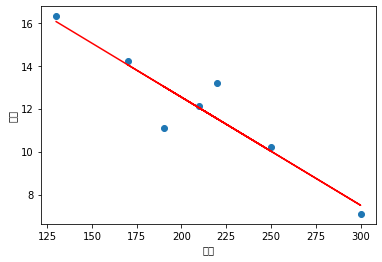

In [ ]:
# 상관계수 구하기
print(PCC.corr())

# 마력에 따른 연비 시각화
plt.scatter(PCC['horsePower'], PCC['efficiency'])
plt.xlabel('마력')
plt.ylabel('연비')

slope, intercept = np.polyfit(PCC['horsePower'], PCC['efficiency'], 1)
plt.plot(PCC['horsePower'], PCC['horsePower'] * slope + intercept, 'r') 
plt.show()

In [ ]:
print('-------------------------- 단순 선형회귀 마력 ~ 연비 --------------------------') 
result = smf.ols('horsePower ~ efficiency', data = PCC).fit() 
#  print(result.summary()) 
# .tables[0] 하면 summary중 첫번째 테이블만 보기
# R-squared: 0.602 
# print(result.conf_int(alpha=0.05)) # 95%신뢰구간(confidence interval) 내 결과 

print('270 마력 자동차의 예상 연비 : ', -0.0682 * 270 + 30.0989)

-------------------------- 단순 선형회귀 마력 ~ 연비 --------------------------
270 마력 자동차의 예상 연비 :  11.684900000000003
